## **Setup and Install Required Packages**

**1. install YOLOv7**

In [ ]:
!git clone https://github.com/WongKinYiu/yolov7

Cloning into 'yolov7'...
remote: Enumerating objects: 1197, done.
remote: Total 1197 (delta 0), reused 0 (delta 0), pack-reused 1197
Receiving objects: 100% (1197/1197), 74.23 MiB | 15.47 MiB/s, done.
Resolving deltas: 100% (519/519), done.


In [ ]:
!pip install -r /content/yolov7/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.2 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1Y1JaiLBZWdgZRfURq8tHS3uv0QCPaOO4
!gdown 1VQsMBk1g6q-aJsOOsE6jM8imTP2yRwGv

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From (original): https://drive.google.com/uc?id=1Y1JaiLBZWdgZRfURq8tHS3uv0QCPaOO4
From (redirected): https://drive.google.com/uc?id=1Y1JaiLBZWdgZRfURq8tHS3uv0QCPaOO4&confirm=t&uuid=67a50aa3-b401-4112-8c0a-b4a0ebde3565
To: /content/yolov7.pt
100% 75.6M/75.6M [00:01<00:00, 46.3MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1VQsMBk1g6q-aJsOOsE6jM8imTP2yRwGv
From (redirected): https://drive.google.com/uc?id=1VQsMBk1g6q-aJsOOsE6jM8imTP2yRwGv&confirm=t&uuid=884c7996-6e10-4077-b1dd-566579b2191f
To: /content/TS.zip
100% 1.87G/1.87G [00:35<00:00, 52.3MB/s]


# **Importing Libraries**

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import torch

## **Test**

**1.  Testing YOLOv7**

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
path = r'/content/yolov7.pt'
model = torch.hub.load('WongKinYiu/yolov7', 'custom', path,
                        force_reload=True)

/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/WongKinYiu/yolov7/zipball/main" to /root/.cache/torch/hub/main.zip
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.

Adding autoShape... 


In [ ]:
model

autoShape(
  (model): Model(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU()
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU()
      )
      (2): Conv(
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU()
      )
      (3): Conv(
        (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU()
      )
 

**2.   Test pre-trained  using image online**



In [ ]:
img = 'https://mywebstats.org/wp-content/uploads/2023/06/what-percentage-of-cats-live-to.jpg'

In [ ]:
results = model(img)
results.print()

image 1/1: 781x1280 1 cat
Speed: 434.7ms pre-process, 1534.2ms inference, 18.8ms NMS per image at shape (1, 3, 416, 640)


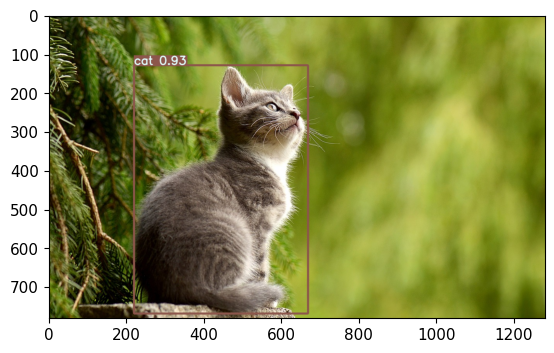

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

## **Setting up the environment.**

**1. Create Directory**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Upload images and labels**

In [ ]:
!apt-get install p7zip-full

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-8).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
!7za x TS.zip


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 1869511035 bytes (1783 MiB)

Extracting archive: TS.zip
--
Path = TS.zip
Type = zip
Physical Size = 1869511035

  0%      0% 24 - labelimg/img/12.jpg                               1% 46 - labelimg/img/14.jpg                               2% 77 - labelimg/img/168.jpg                                3% 99 - labelimg/img/188.jpg                                4% 126 - labelimg/img/211.jpg                               

## **Training**

In [ ]:
!cd yolov7 && python train.py --workers 1 --device 0 --batch-size 5 --epochs 400 --img 500 500 --hyp data/hyp.scratch.custom.yaml --cache --name yolov7-custom --weights yolov7.pt

2024-01-16 19:55:28.574160: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-16 19:55:28.574210: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-16 19:55:28.579354: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-16 19:55:31.908262: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
YOLOR 🚀 v0.1-128-ga207844 torch 2.1.0+cu121 CUDA:0 (Tesla T4, 15102.0625MB)

Namespace(weights='yolov7.pt', cfg='', data='data/coco.yaml', hyp='data/hyp.scratch.custom.yaml', epochs=400, batch_size=5, img_size=[500, 500], rect=False, resume=

In [ ]:
path = r'/content/yolov7/runs/train/yolov7-custom2/weights/last.pt'
model = torch.hub.load("WongKinYiu/yolov7","custom",f"{path}")

Using cache found in /root/.cache/torch/hub/WongKinYiu_yolov7_main


Adding autoShape... 


## **Result Visualization**

In [ ]:
try:
    from PIL import Image
except ImportError:
    import Image

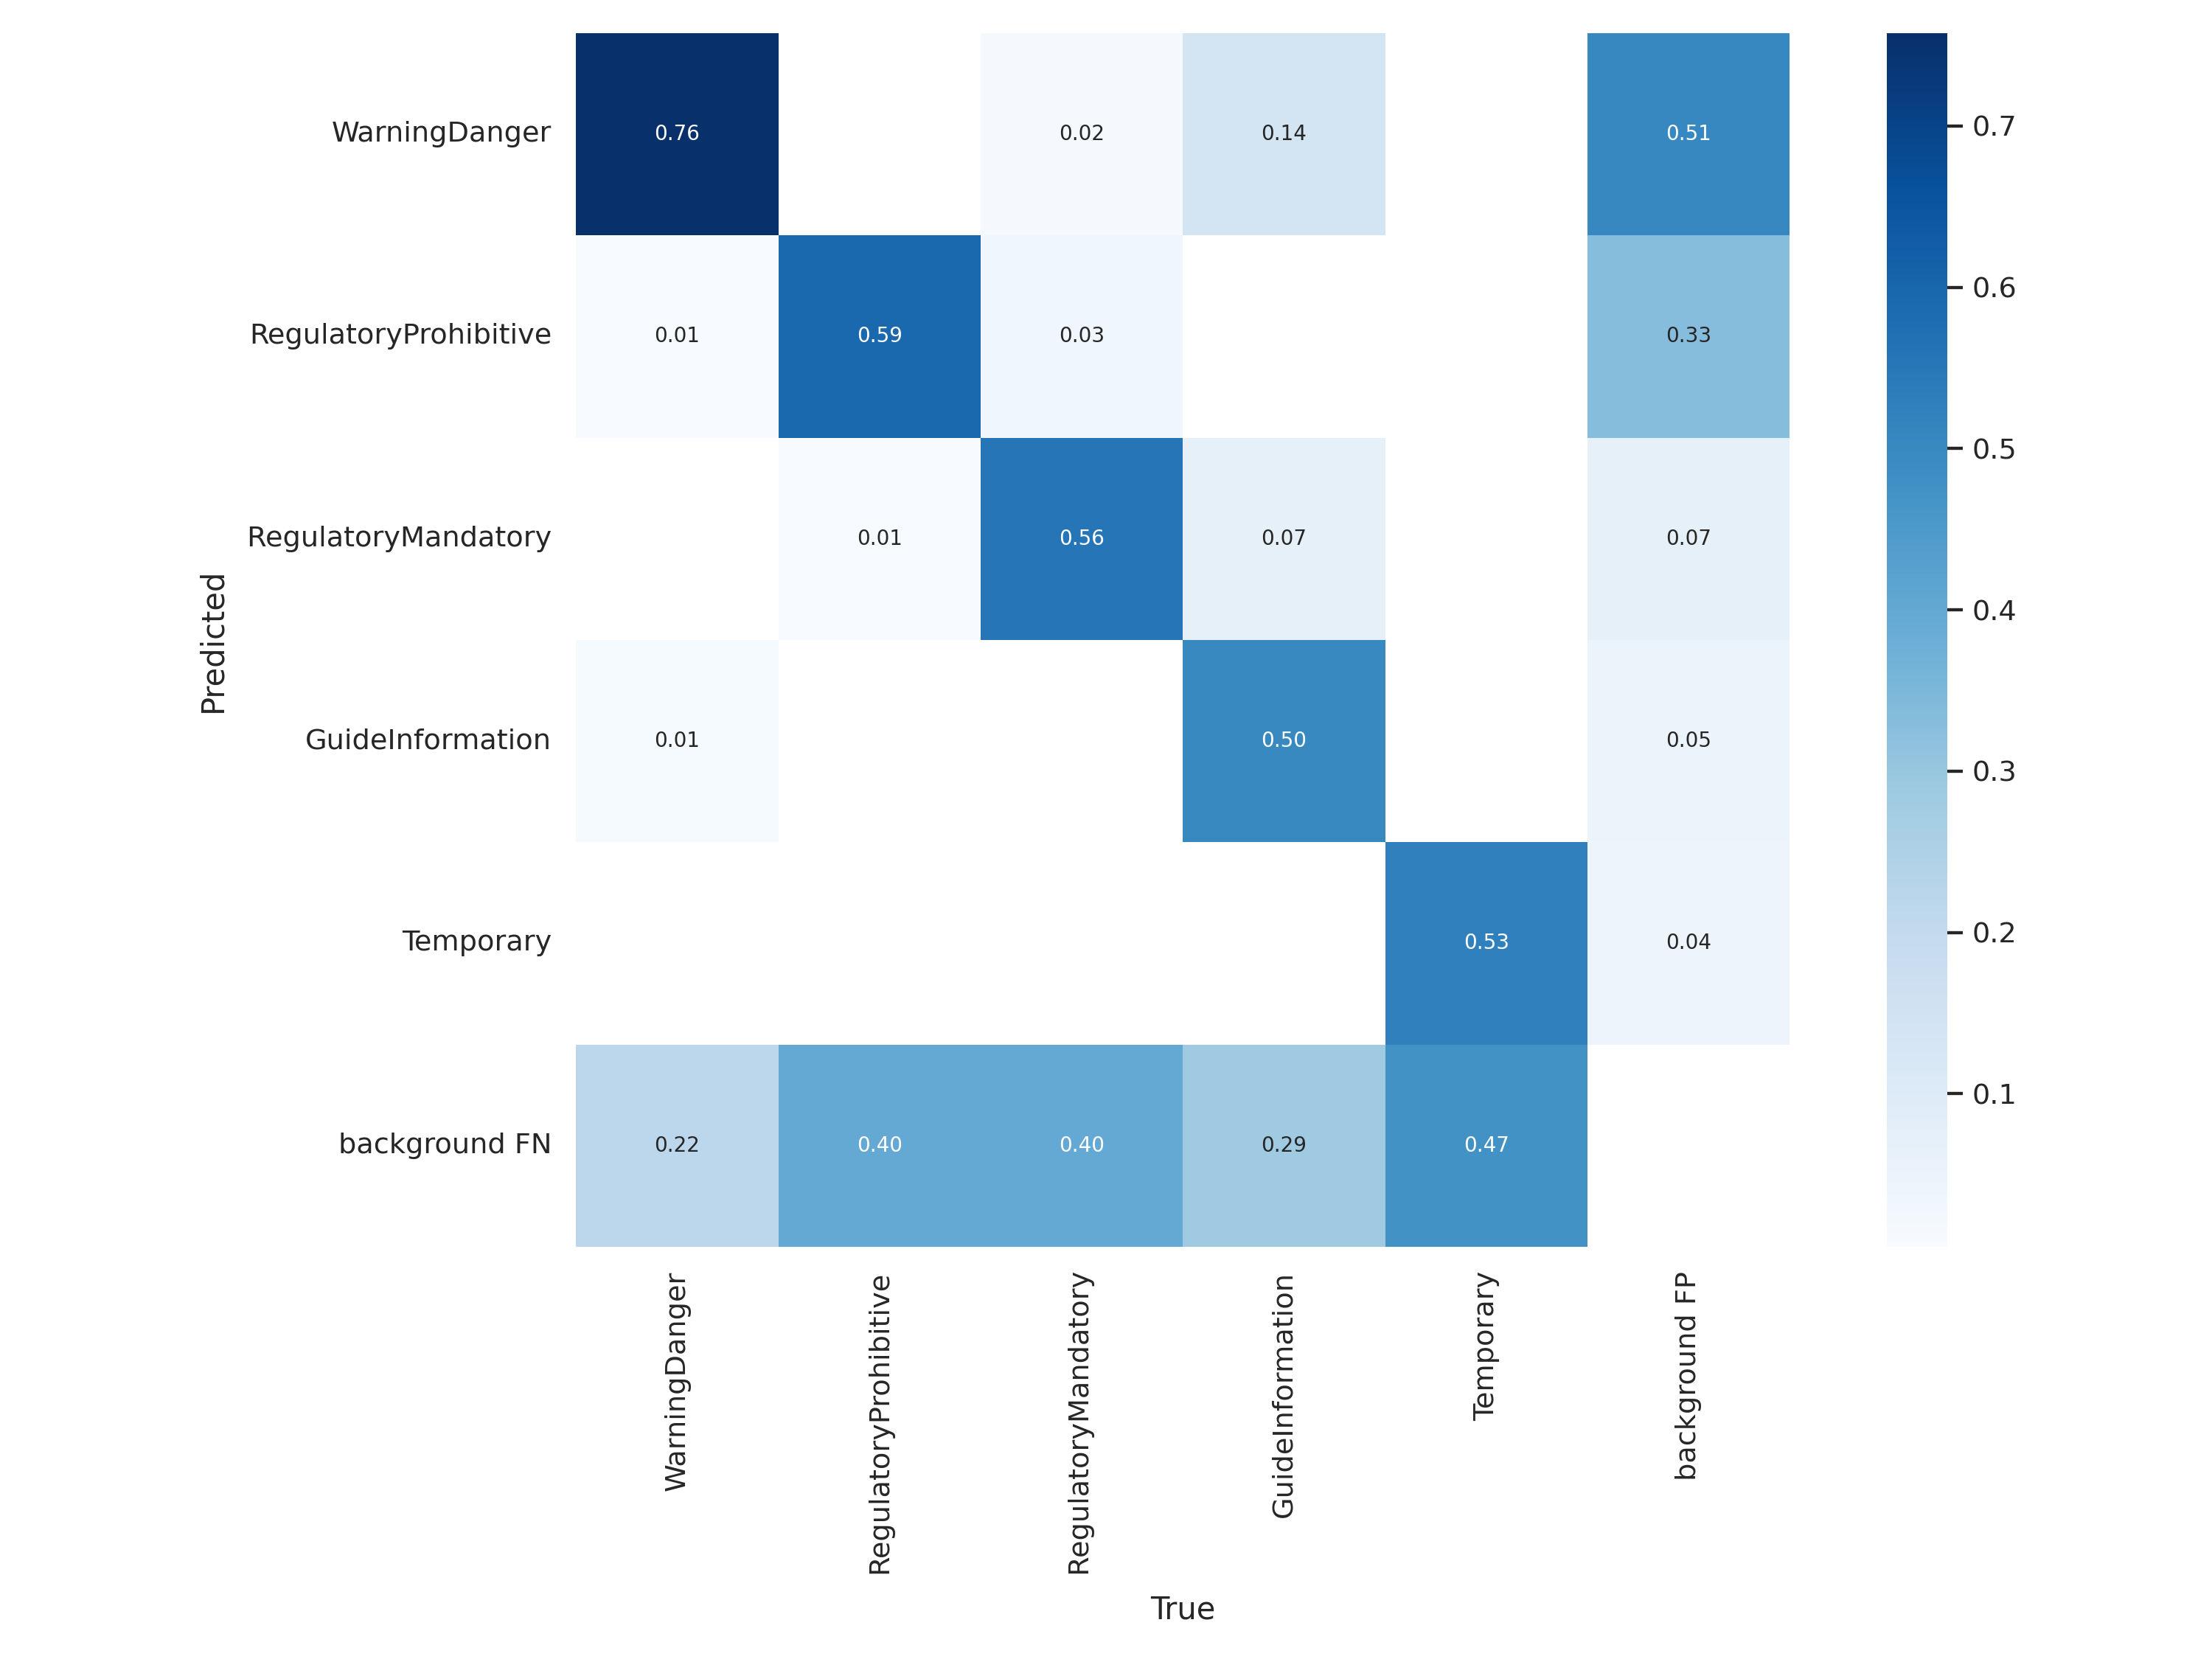

In [ ]:
Image.open("/content/yolov7/runs/train/yolov7-custom2/confusion_matrix.png")

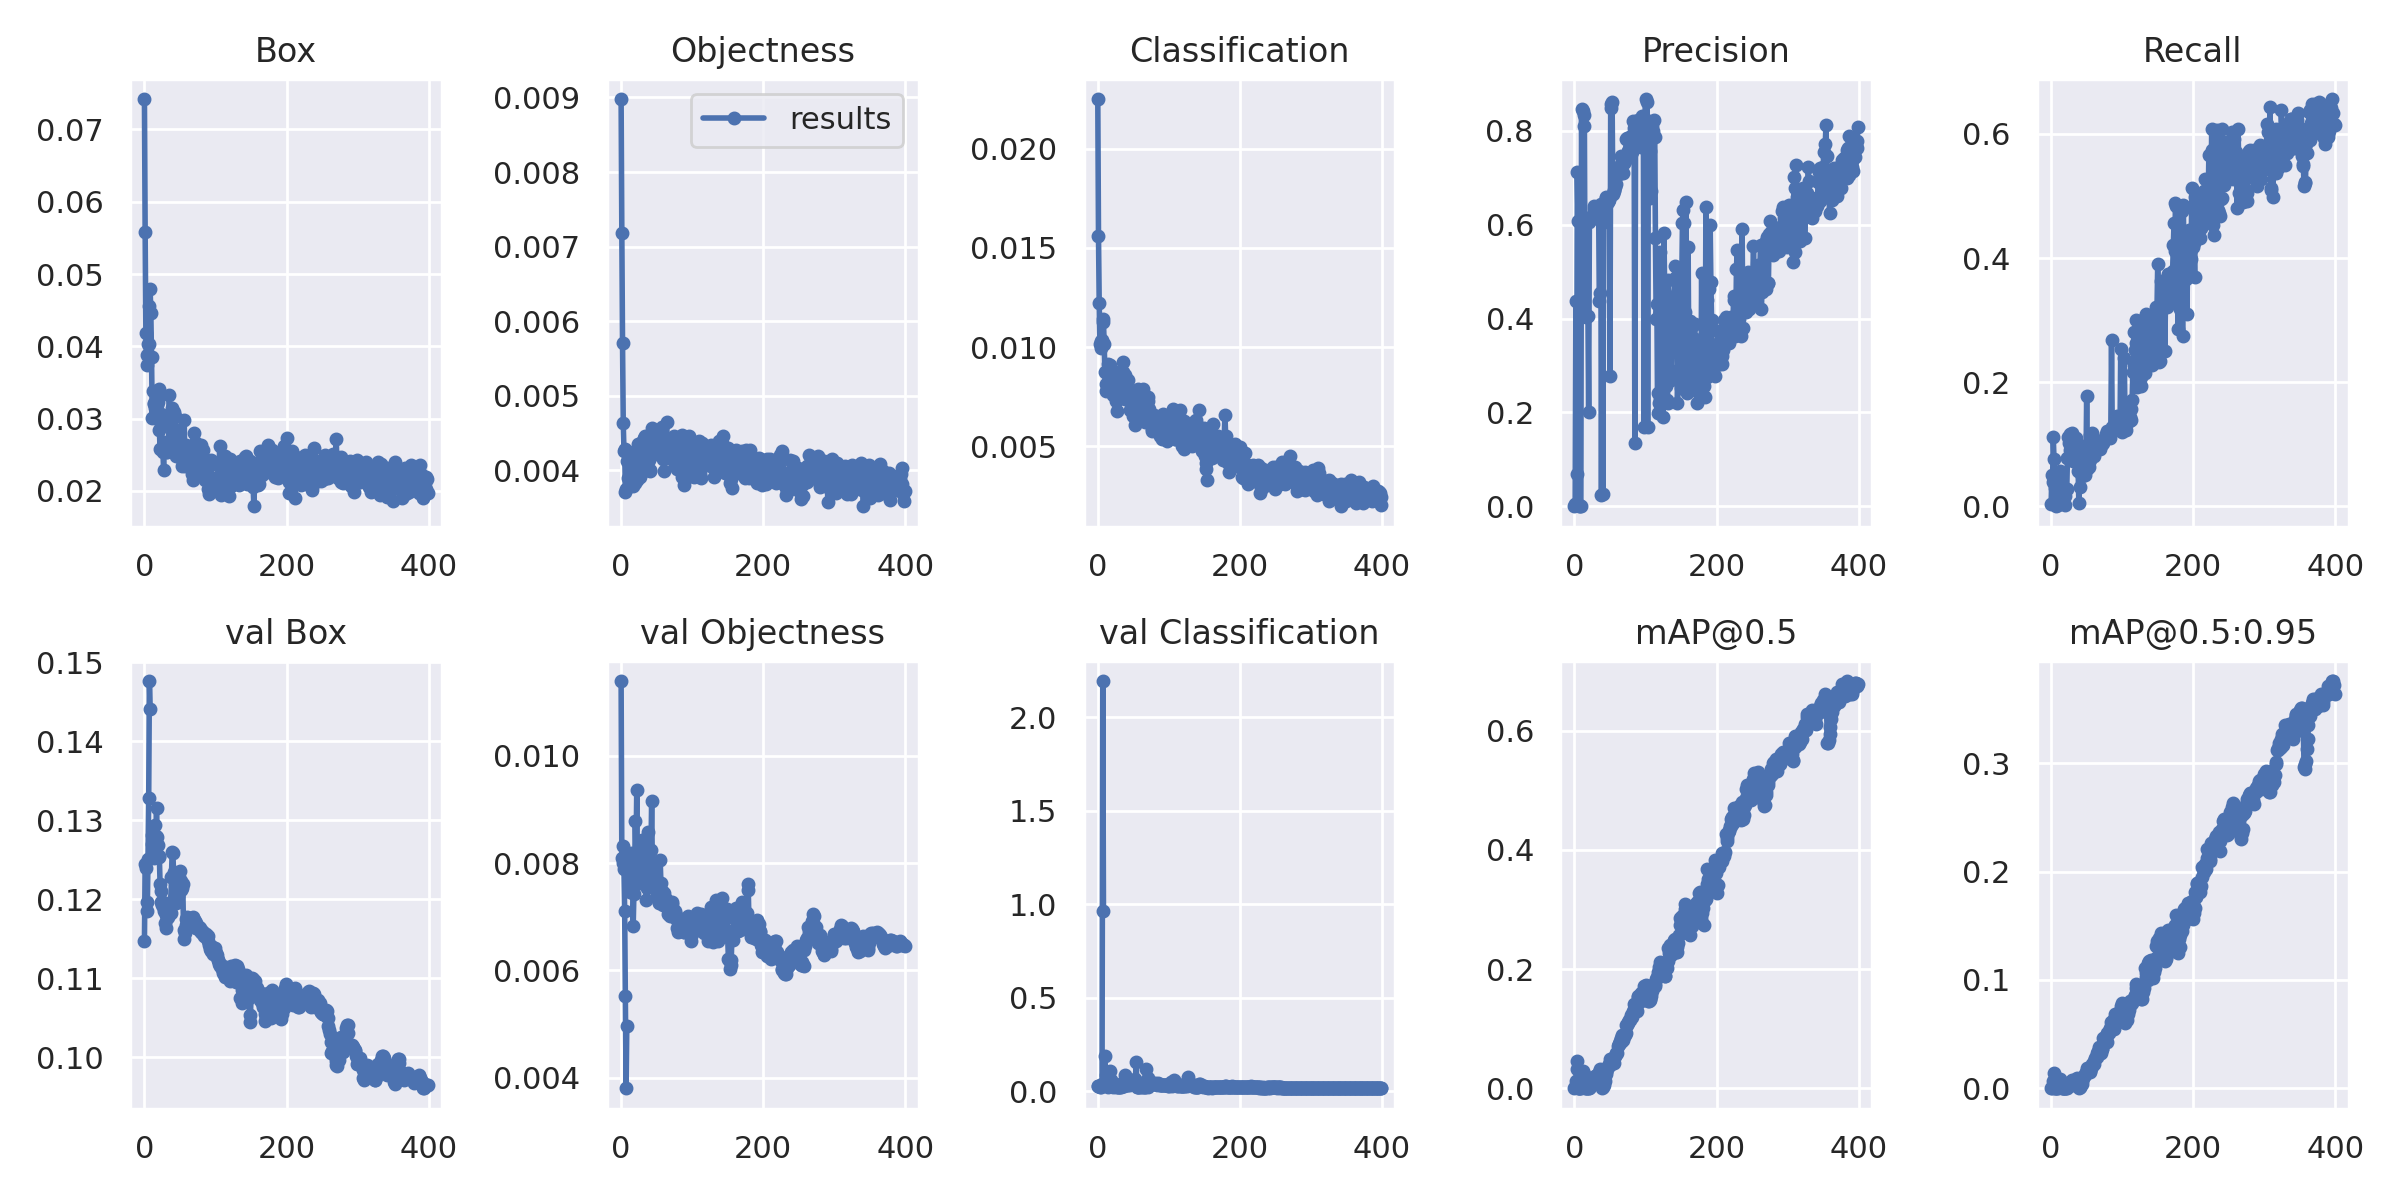

In [ ]:
Image.open("/content/yolov7/runs/train/yolov7-custom2/results.png")

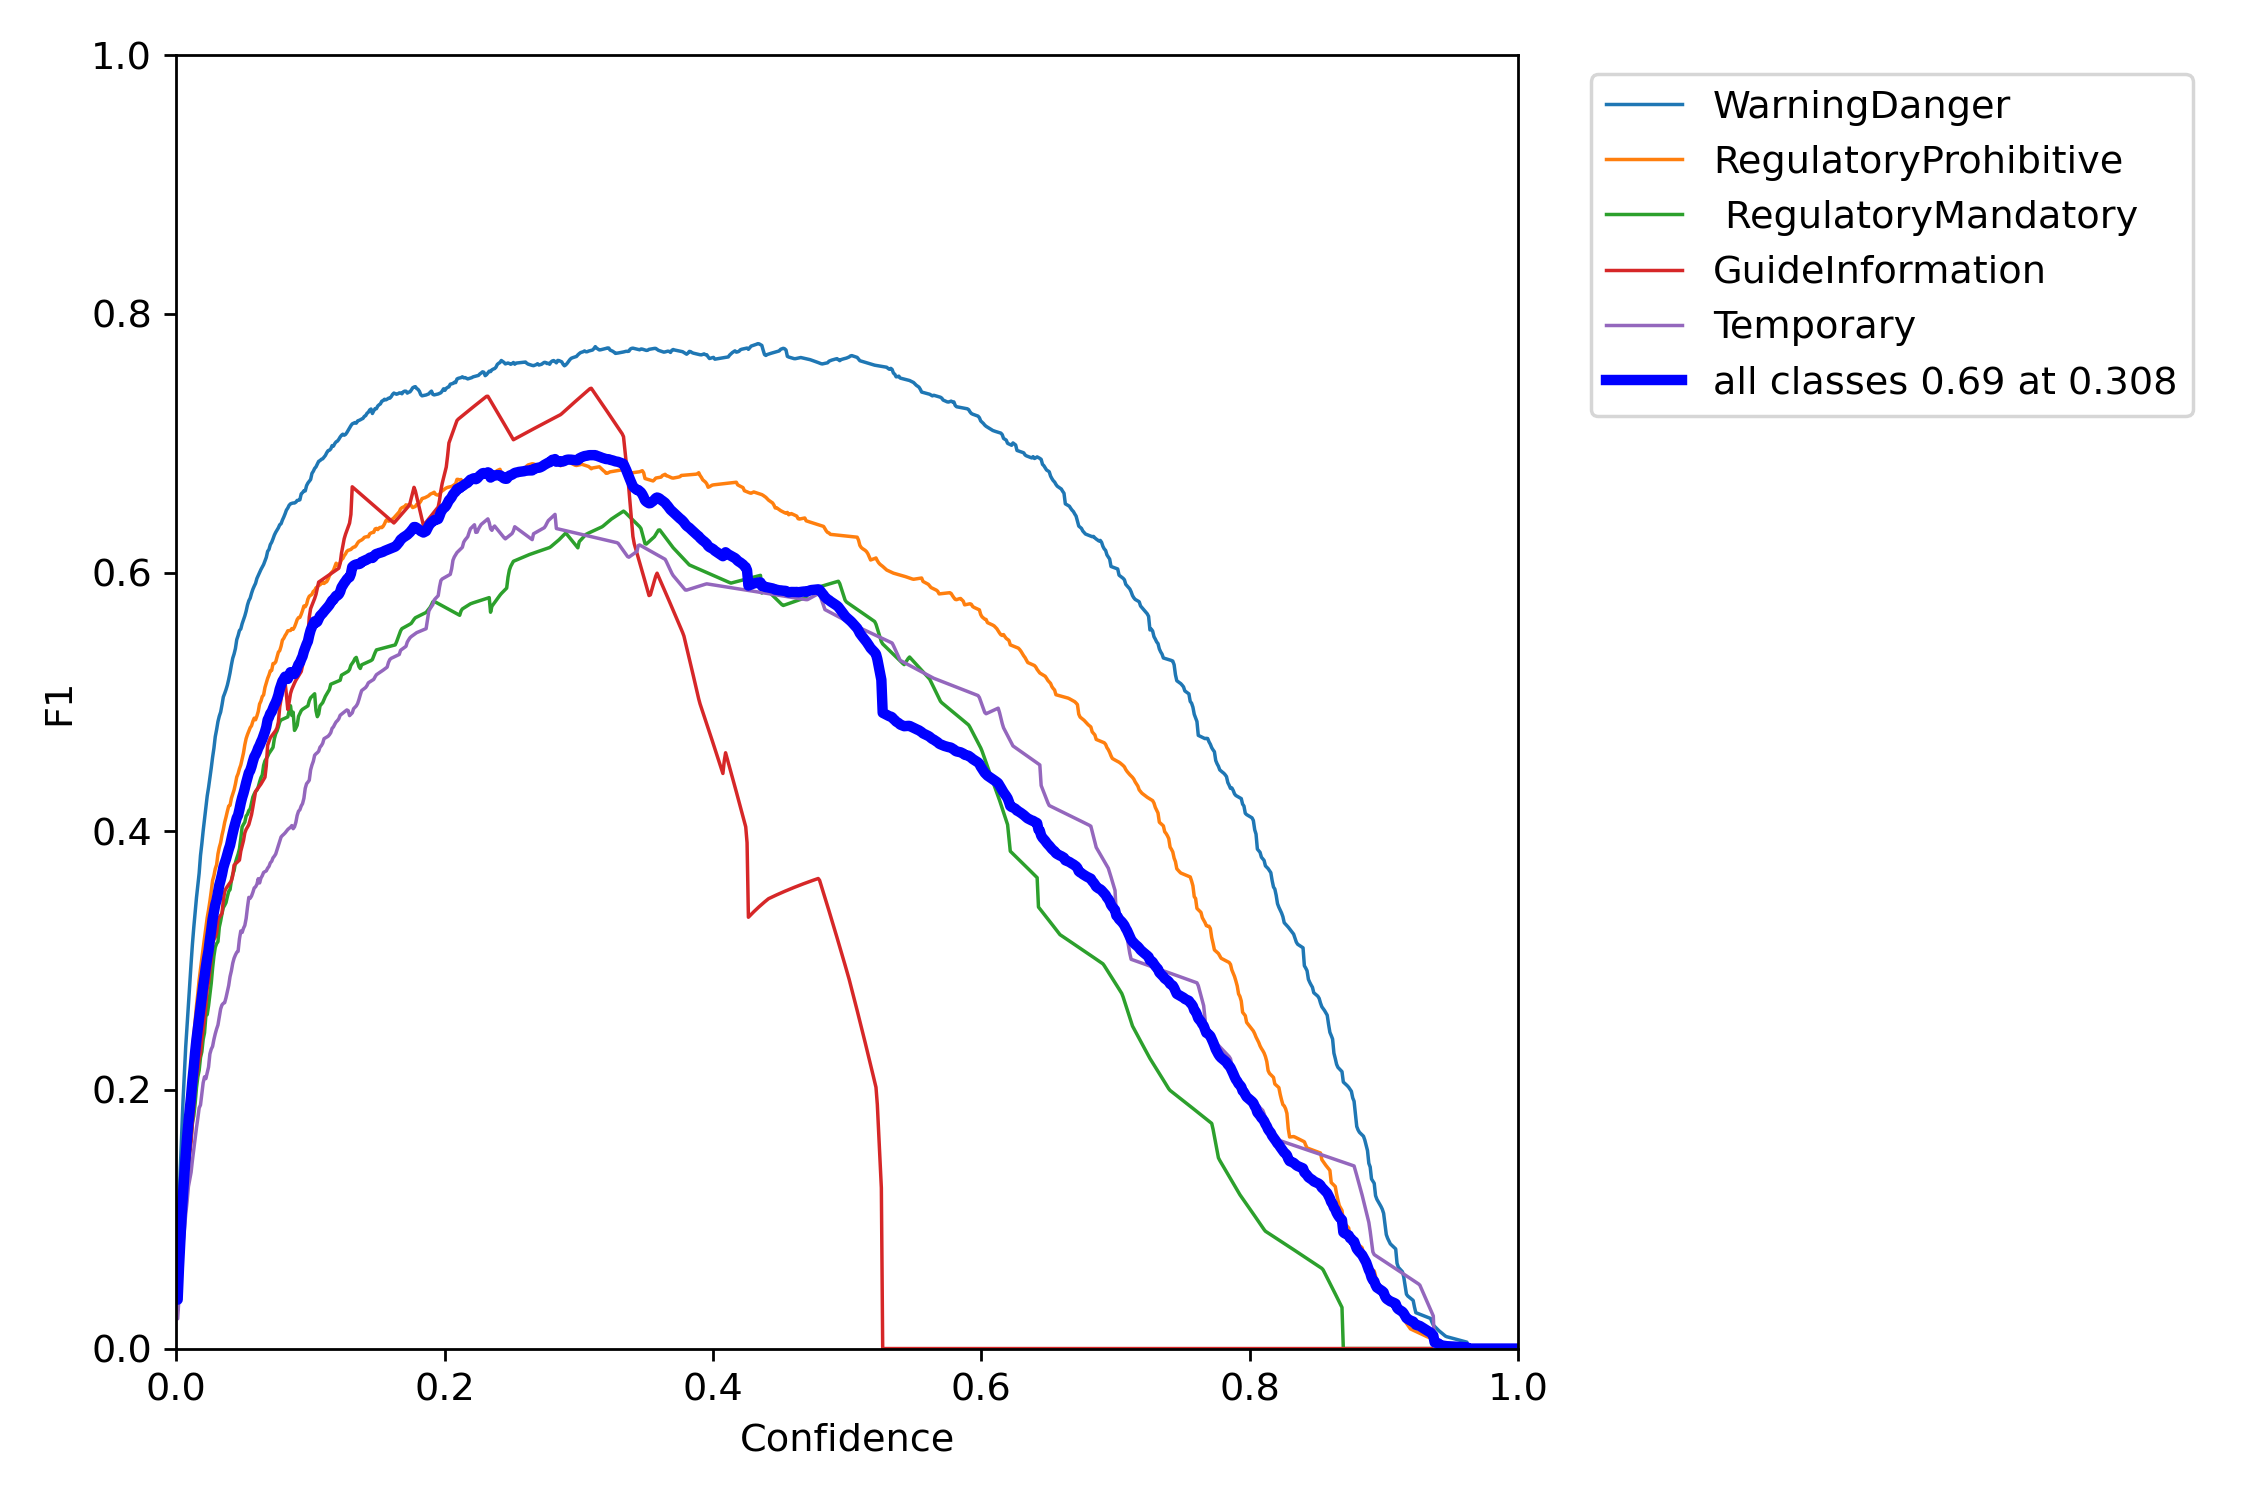

In [ ]:
Image.open("/content/yolov7/runs/train/yolov7-custom2/F1_curve.png")

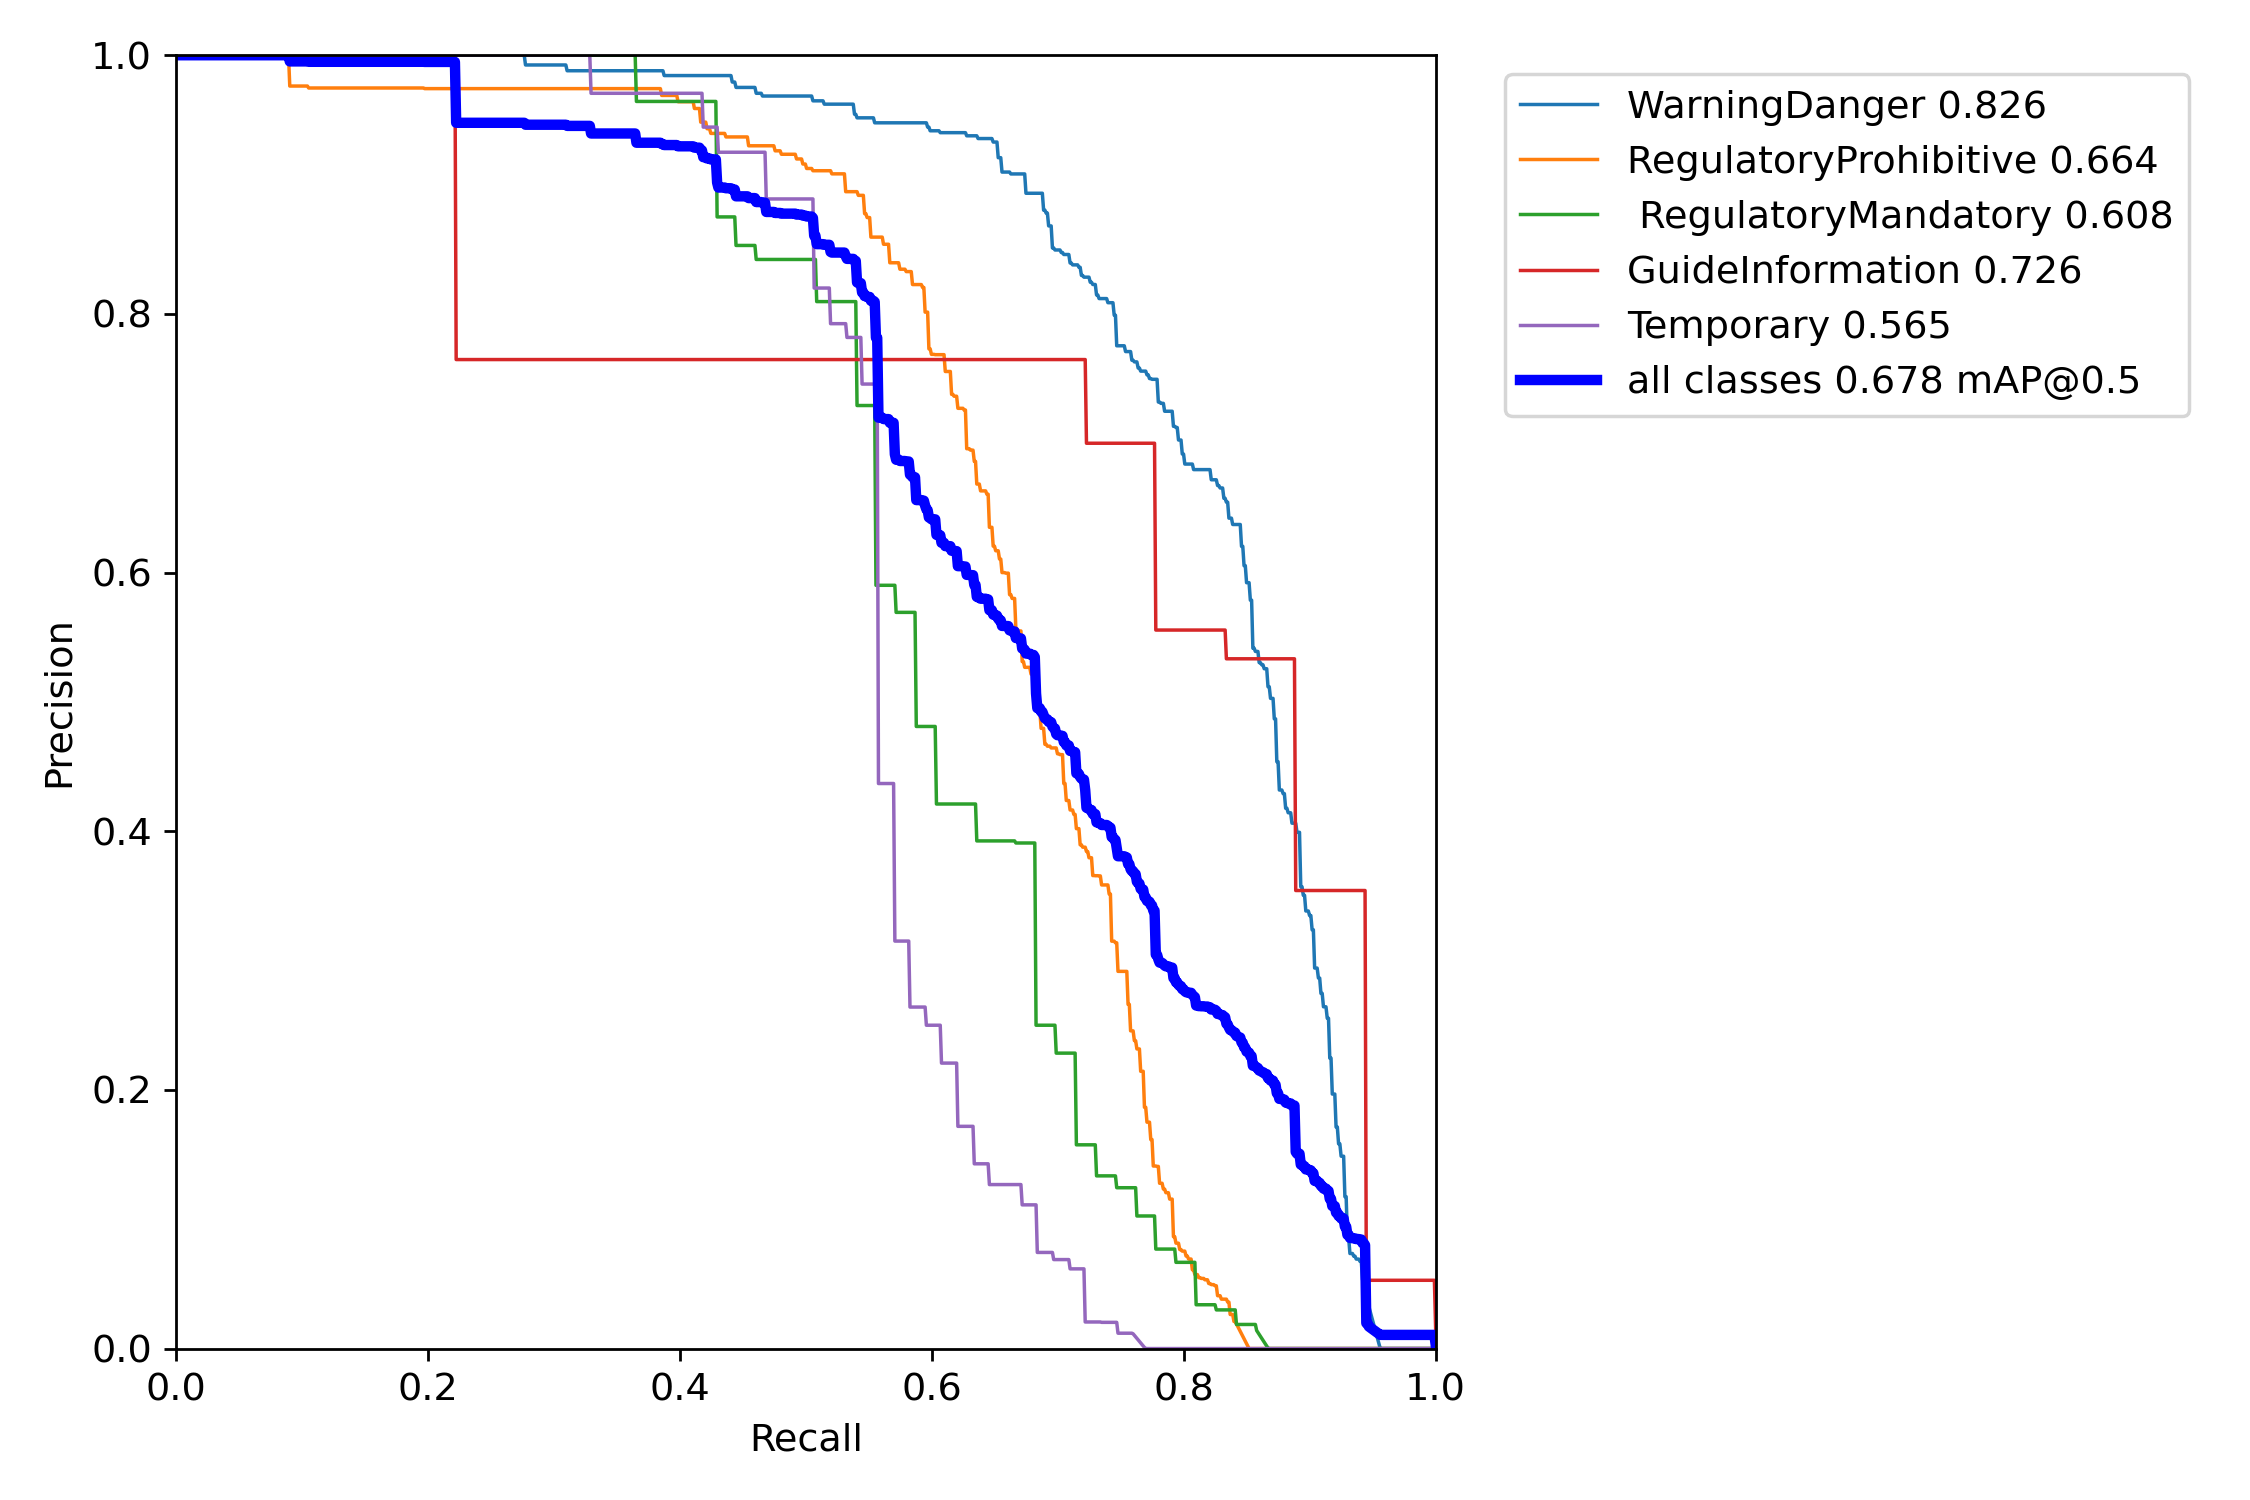

In [ ]:
Image.open("/content/yolov7/runs/train/yolov7-custom2/PR_curve.png")

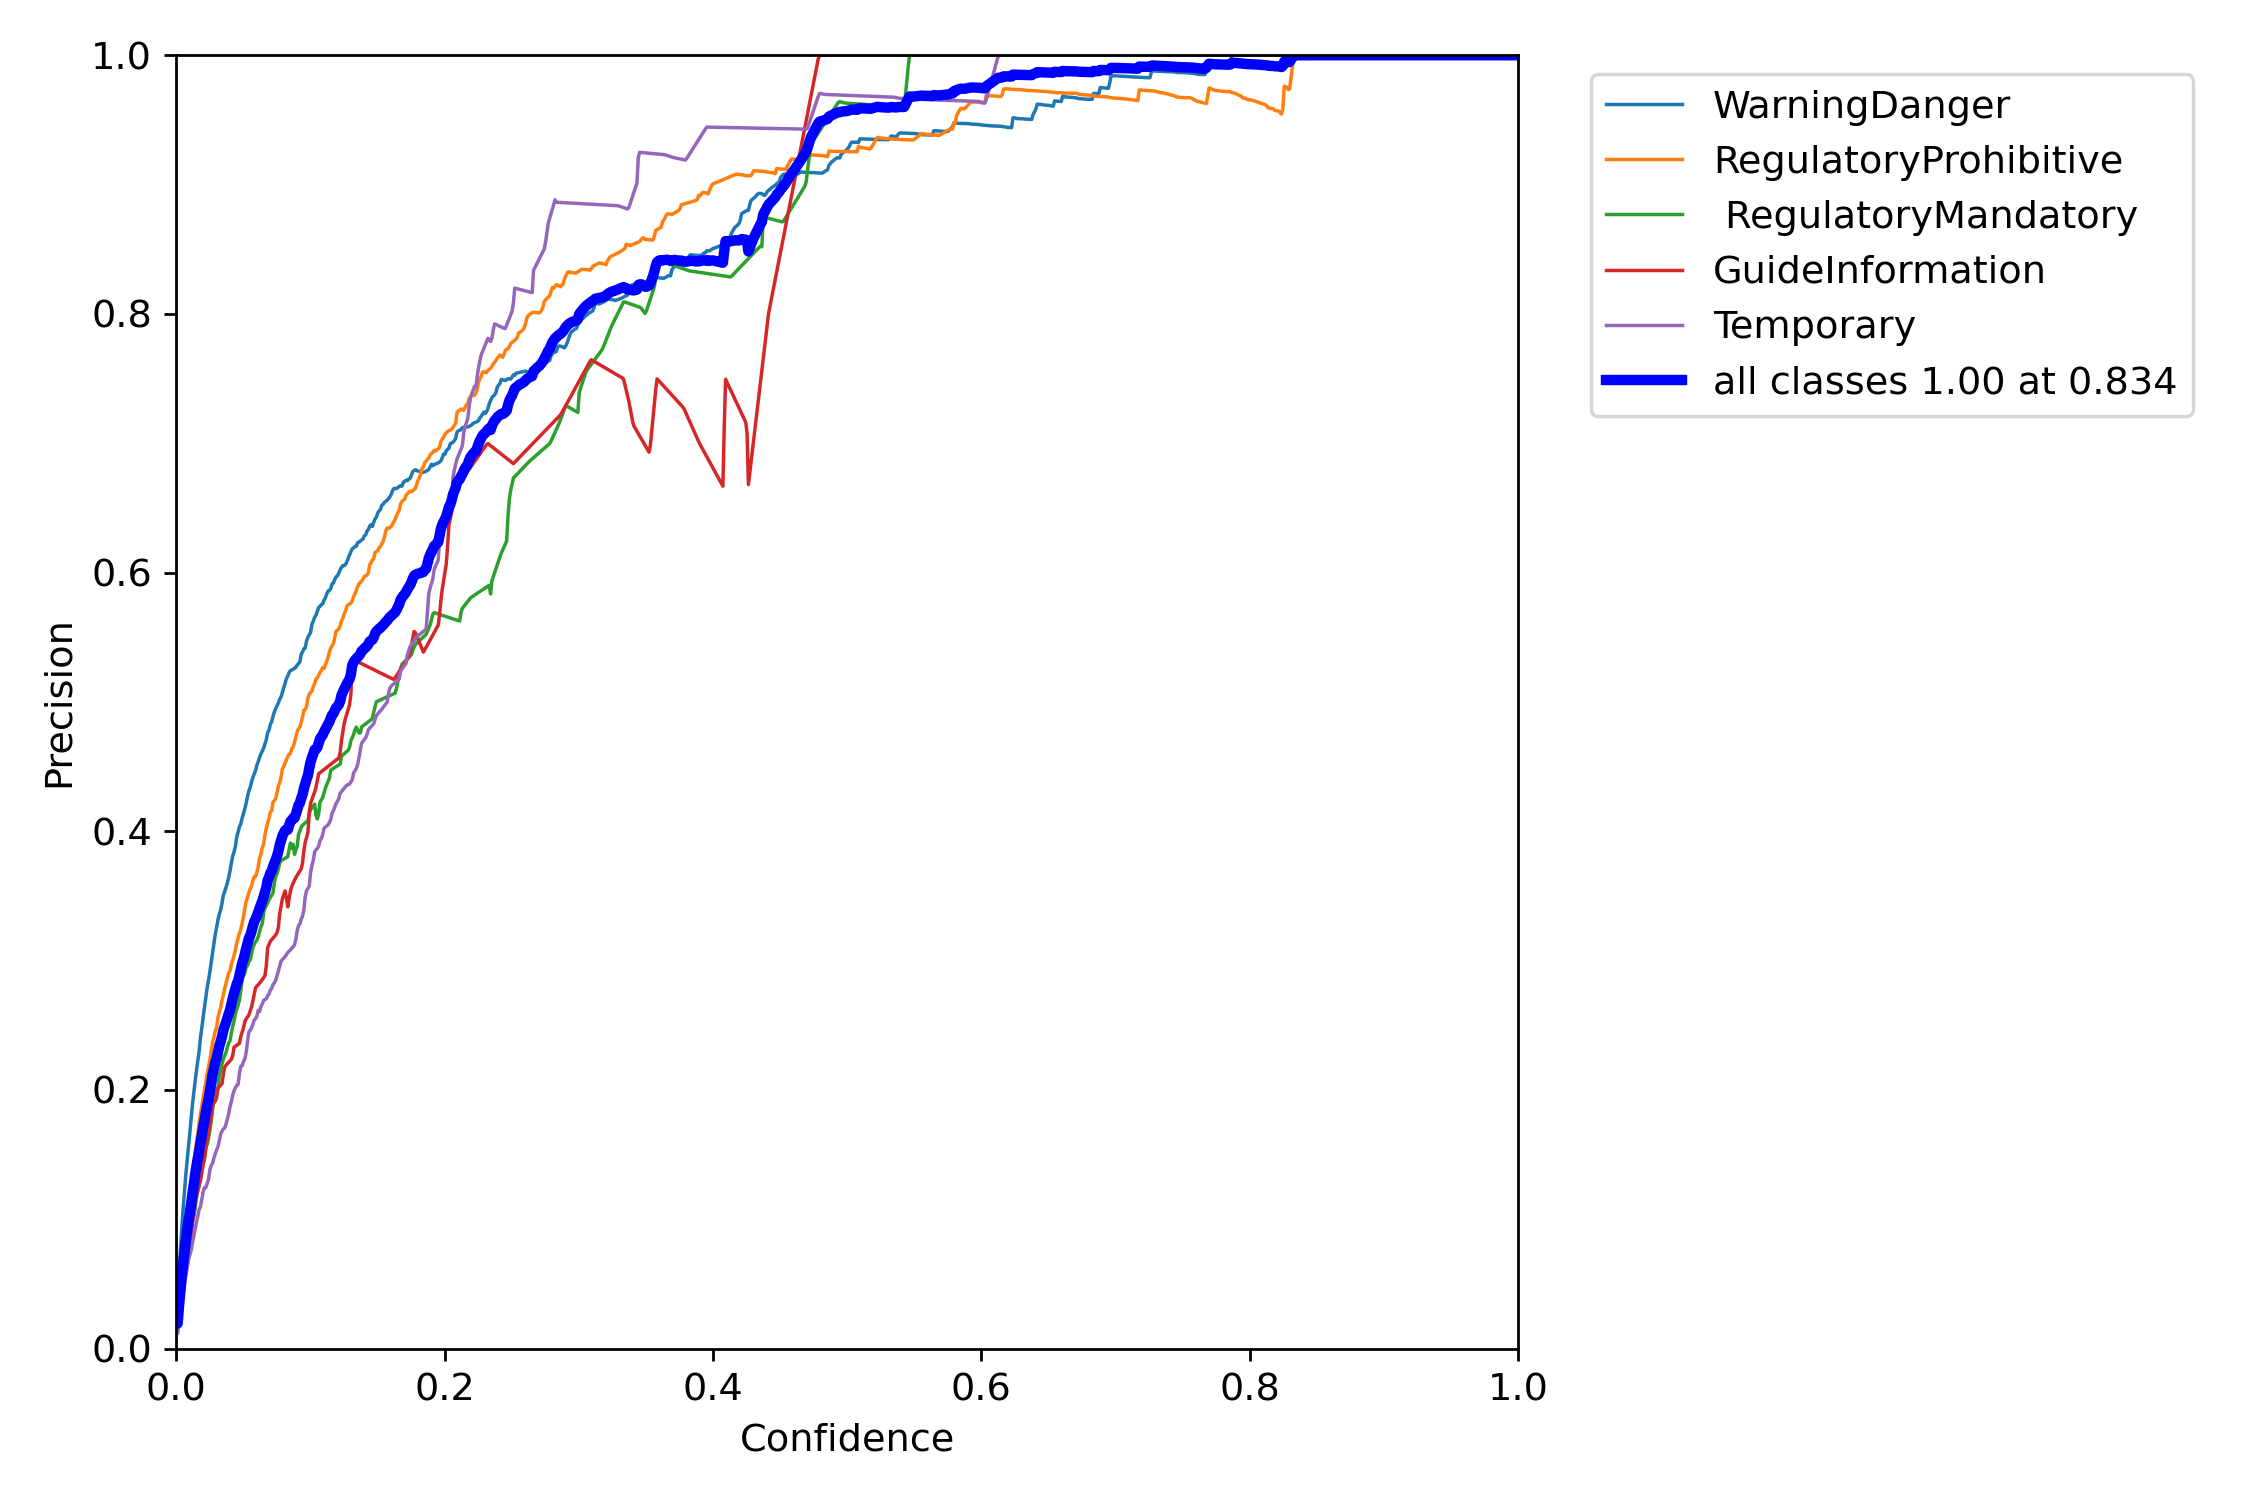

In [ ]:
Image.open("/content/yolov7/runs/train/yolov7-custom2/P_curve.png")

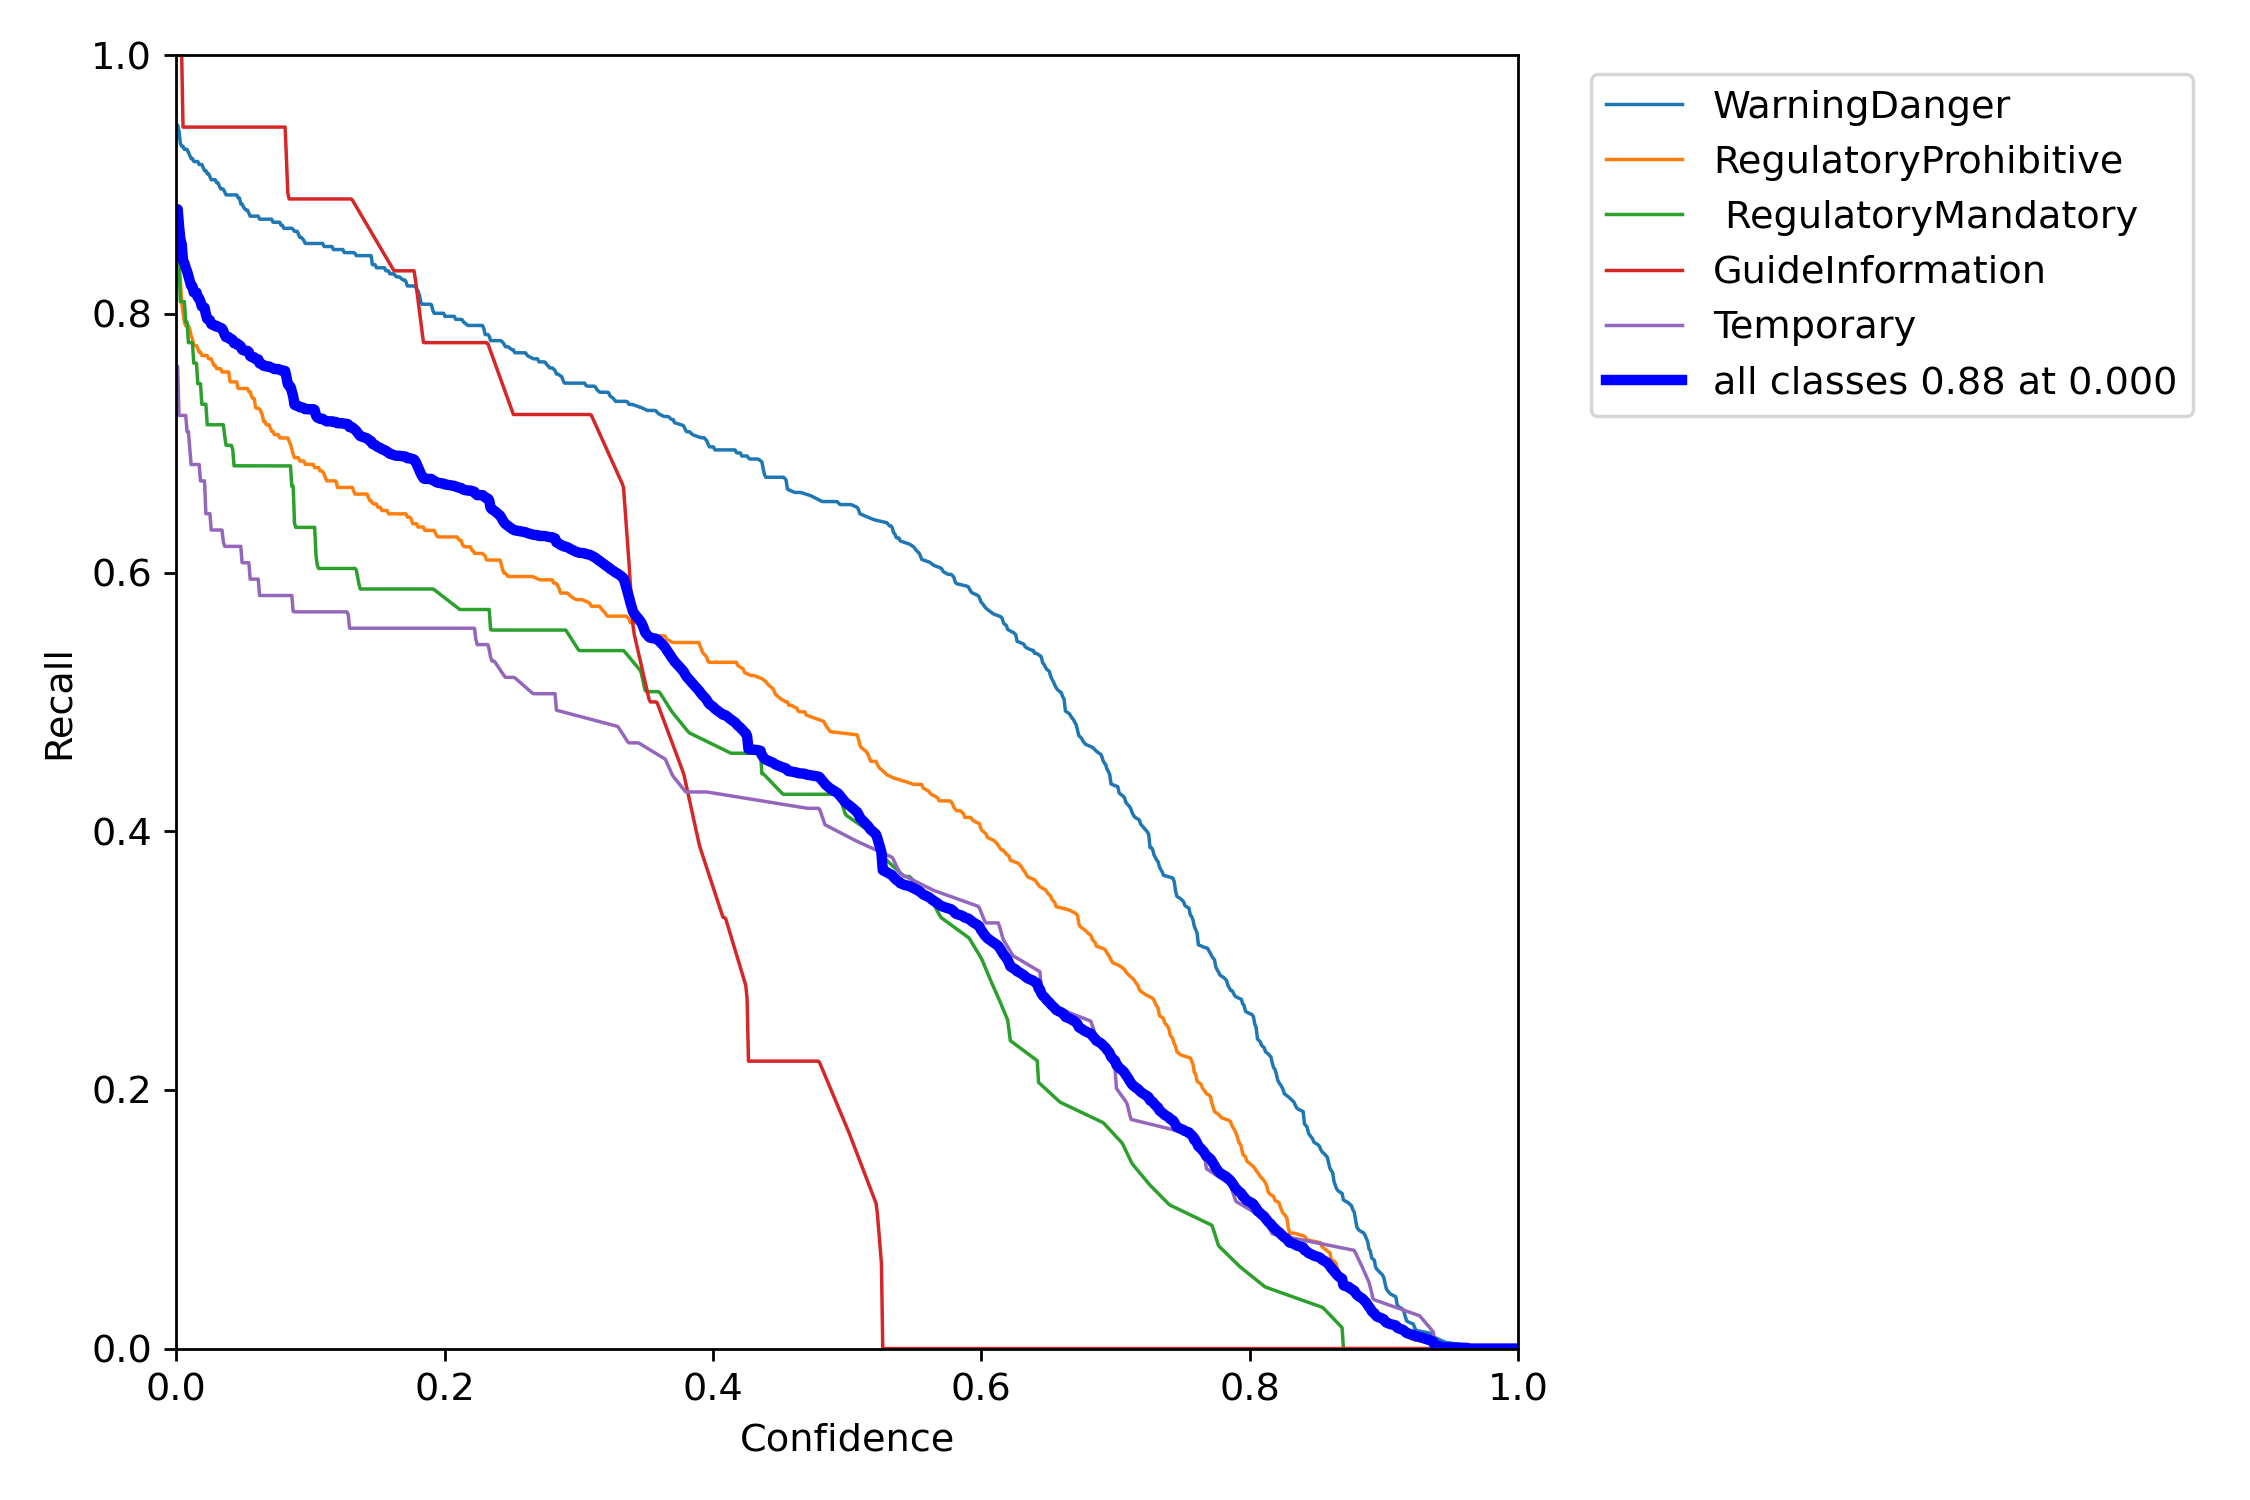

In [ ]:
Image.open("/content/yolov7/runs/train/yolov7-custom2/R_curve.png")

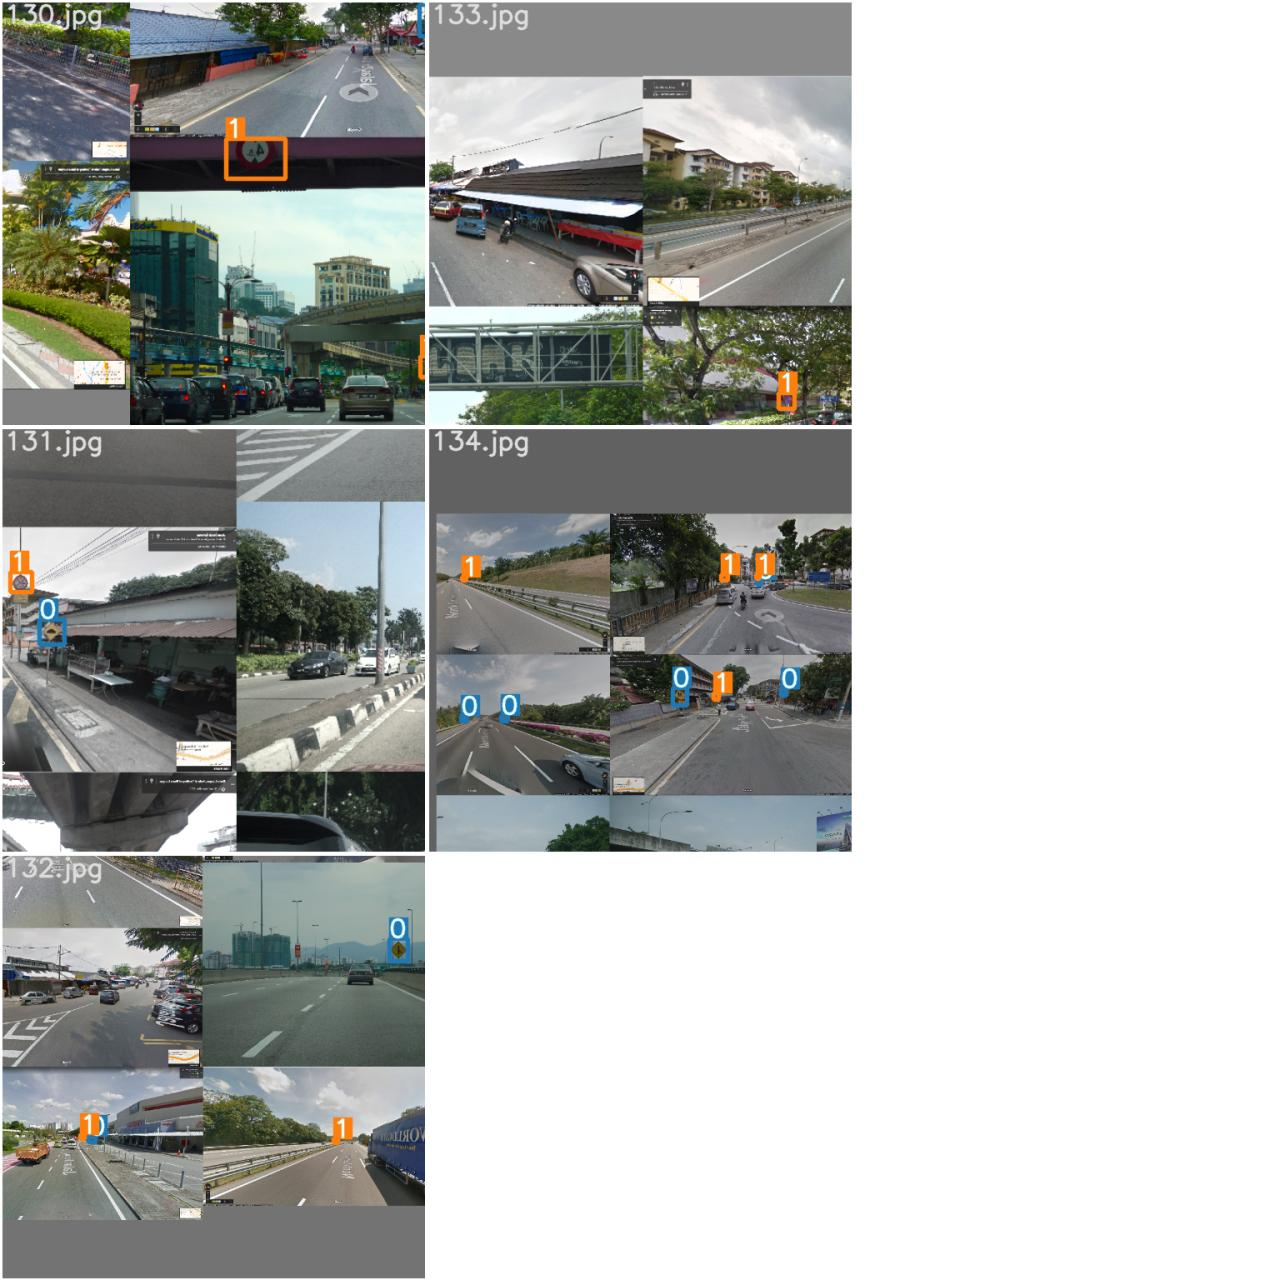

In [ ]:
Image.open("/content/yolov7/runs/train/yolov7-custom2/train_batch7.jpg")

## **Predict**

**1. Predict using video**

In [ ]:
!gdown 1LJvoN7dC_JUBxCBt3Zd_A91LulEko528

Downloading...
From: https://drive.google.com/uc?id=1LJvoN7dC_JUBxCBt3Zd_A91LulEko528
To: /content/ts_Video .mp4
100% 12.9M/12.9M [00:00<00:00, 25.4MB/s]


In [ ]:
# Set the current working directory to the YOLOv7 directory
import os
os.chdir('/content/yolov7')

# Run YOLOv7 detection on a video
!python detect.py --weights '/content/yolov7/runs/train/yolov7-custom2/weights/last.pt' \
                  --conf 0.5 \
                  --img-size 640 \
                  --source '/content/ts_Video .mp4'


Namespace(weights=['/content/yolov7/runs/train/yolov7-custom2/weights/last.pt'], source='/content/ts_Video .mp4', img_size=640, conf_thres=0.5, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.1.0+cu121 CUDA:0 (Tesla T4, 15102.0625MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 306 layers, 36501466 parameters, 6194944 gradients, 103.2 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 model

**1. Predict using image**

In [ ]:
img = "/content/labelimg/images/10.jpg"

In [ ]:
results = model(img)

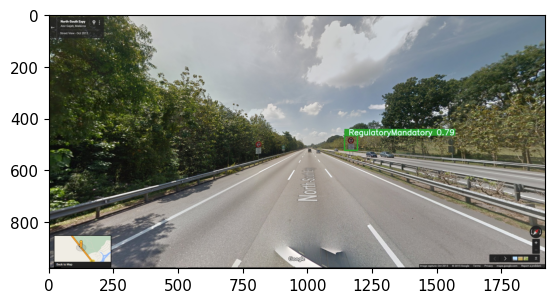

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
!zip -r /content/file.zip /content/yolov7/runs/train/yolov7-custom2

  adding: content/yolov7/runs/train/yolov7-custom2/ (stored 0%)
  adding: content/yolov7/runs/train/yolov7-custom2/results.txt (deflated 75%)
  adding: content/yolov7/runs/train/yolov7-custom2/test_batch0_pred.jpg (deflated 8%)
  adding: content/yolov7/runs/train/yolov7-custom2/PR_curve.png (deflated 10%)
  adding: content/yolov7/runs/train/yolov7-custom2/hyp.yaml (deflated 44%)
  adding: content/yolov7/runs/train/yolov7-custom2/test_batch1_labels.jpg (deflated 8%)
  adding: content/yolov7/runs/train/yolov7-custom2/train_batch6.jpg (deflated 13%)
  adding: content/yolov7/runs/train/yolov7-custom2/test_batch1_pred.jpg (deflated 8%)
  adding: content/yolov7/runs/train/yolov7-custom2/events.out.tfevents.1705423844.b042e26ed5ac.5134.0 (deflated 70%)
  adding: content/yolov7/runs/train/yolov7-custom2/train_batch3.jpg (deflated 12%)
  adding: content/yolov7/runs/train/yolov7-custom2/test_batch2_pred.jpg (deflated 13%)
  adding: content/yolov7/runs/train/yolov7-custom2/opt.yaml (deflated 47%)

In [ ]:
!cp /content/drive/MyDrive/video/data.zip /content/data.zip


/content/drive/MyDrive/video: Scheme missing.


In [ ]:
!cd "/content/yolov7" && python detect.py --weights '/content/yolov7/runs/train/yolov7-custom2/weights/last.pt' --conf 0.5 --img-size 512 --source /content/ts_Video.mp4


Namespace(weights=['/content/yolov7/runs/train/yolov7-custom2/weights/last.pt'], source='/content/ts_Video.mp4', img_size=512, conf_thres=0.5, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.1.0+cu121 CUDA:0 (Tesla T4, 15102.0625MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 306 layers, 36501466 parameters, 6194944 gradients, 103.2 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 model 

In [ ]:
!cd /content/yolov7
!git pull


Already up to date.


In [ ]:
!cd "/content/yolov7" && python detect.py --weights '/content/yolov7/runs/train/yolov7-custom2/weights/last.pt' --conf 0.5 --img-size 512 --source /content/ts_Video.mp4 --save-txt --save-conf


Namespace(weights=['/content/yolov7/runs/train/yolov7-custom2/weights/last.pt'], source='/content/ts_Video.mp4', img_size=512, conf_thres=0.5, iou_thres=0.45, device='', view_img=False, save_txt=True, save_conf=True, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.1.0+cu121 CUDA:0 (Tesla T4, 15102.0625MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 306 layers, 36501466 parameters, 6194944 gradients, 103.2 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is

In [ ]:
# Install necessary libraries for virtual desktop (run this in a Colab cell)
!apt-get install -y xvfb x11-utils
!pip install pyvirtualdisplay


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 libxtst6 libxxf86dga1 x11-xkb-utils xfonts-base
  xfonts-encodings xfonts-utils xserver-common
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 libxtst6 libxxf86dga1 x11-utils x11-xkb-utils xfonts-base
  xfonts-encodings xfonts-utils xserver-common xvfb
0 upgraded, 12 newly installed, 0 to remove and 24 not upgraded.
Need to get 8,045 kB of archives.
After this operation, 12.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1.1.0-1build3 [71.8 kB]
Get:4 http://archive.ubuntu.

In [ ]:
# Run the YOLOv7 script with virtual display
from pyvirtualdisplay import Display

display = Display(visible=0, size=(1400, 900))
display.start()

!cd "/content/yolov7" && python detect.py --weights '/content/yolov7/runs/train/yolov7-custom2/weights/last.pt' --conf 0.5 --img-size 512 --source /content/ts_Video.mp4 --view-img

display.stop()


Namespace(weights=['/content/yolov7/runs/train/yolov7-custom2/weights/last.pt'], source='/content/ts_Video.mp4', img_size=512, conf_thres=0.5, iou_thres=0.45, device='', view_img=True, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.1.0+cu121 CUDA:0 (Tesla T4, 15102.0625MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 306 layers, 36501466 parameters, 6194944 gradients, 103.2 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 model i

In [ ]:
!cd "/content/yolov7" && python detect.py --weights '/content/yolov7/runs/train/yolov7-custom2/weights/last.pt' --conf 0.5 --img-size 512 --source /content/test2.mp4 --save-txt --save-conf --project runs/detect --name my_output


Namespace(weights=['/content/yolov7/runs/train/yolov7-custom2/weights/last.pt'], source='/content/test2.mp4', img_size=512, conf_thres=0.5, iou_thres=0.45, device='', view_img=False, save_txt=True, save_conf=True, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='my_output', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.1.0+cu121 CUDA:0 (Tesla T4, 15102.0625MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 306 layers, 36501466 parameters, 6194944 gradients, 103.2 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 model

In [ ]:
# Zip the output directory
!zip -r /content/my_output.zip /content/yolov7/runs/detect/my_output

# Download the ZIP archive
files.download("/content/my_output.zip")


updating: content/yolov7/runs/detect/my_output/ (stored 0%)
updating: content/yolov7/runs/detect/my_output/labels/ (stored 0%)
updating: content/yolov7/runs/detect/my_output/labels/ts_Video_13.txt (deflated 13%)
updating: content/yolov7/runs/detect/my_output/labels/ts_Video_10.txt (deflated 15%)
updating: content/yolov7/runs/detect/my_output/labels/ts_Video_560.txt (deflated 12%)
updating: content/yolov7/runs/detect/my_output/labels/ts_Video_122.txt (deflated 13%)
updating: content/yolov7/runs/detect/my_output/labels/ts_Video_70.txt (deflated 11%)
updating: content/yolov7/runs/detect/my_output/labels/ts_Video_89.txt (deflated 9%)
updating: content/yolov7/runs/detect/my_output/labels/ts_Video_57.txt (deflated 12%)
updating: content/yolov7/runs/detect/my_output/labels/ts_Video_310.txt (deflated 12%)
updating: content/yolov7/runs/detect/my_output/labels/ts_Video_298.txt (deflated 12%)
updating: content/yolov7/runs/detect/my_output/labels/ts_Video_125.txt (deflated 10%)
updating: content/y